# Machine Learning Project - Credit Card Fraud Detection
### Artificial Neural Networks

**Dataset:**
Credit Card Fraud data: https://www.kaggle.com/mlg-ulb/creditcardfraud/

**Objective:** Predict instances of credit card fraud data using an Artificial Neural Network (ANN)

## EDA

#### Import Packages

In [1]:
# get all the import stuff taken care of

#general stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# plotting
import seaborn as sns

# will show plots without doing plt.show()
%matplotlib inline

#Source: Week 5 Lecture

#### Load in the dataset

In [2]:
# Read dataset to pandas dataframe
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Looking at some of the output, there are a lot of features and the 'Class' column is the goal label.  I test below to find out that it is a binary class.  

In [3]:
df.Class.unique()

array([0, 1], dtype=int64)

In [4]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset has all numeric features and doesn't have any missing values.  I will not have to do any data cleaning or imputing.

#### Correlation Matrix

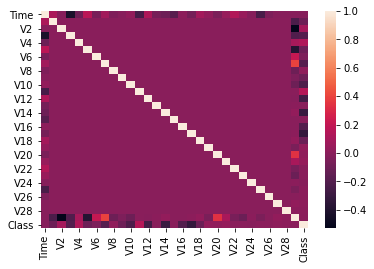

In [6]:
_ = sns.heatmap(df.corr())

There is a lot of low correlation here.  It looks like some of the middle features (V14, V16, and V18) have slightly more negative correlations with Class than other variables.  V28 and 'Time' seem to have higher absolute value correlations than other features.  But nothing stands out too much.

#### Histogram

In [7]:
# Find out how many of each class there are
balance_counts = df.groupby('Class')['Class'].agg('count').values
balance_counts

array([284315,    492], dtype=int64)

The data is very imbalanced.  There are many more instances of regular transactions than fraud.  This is good for the bank, but not so good for plotting a histogram.  I use a logarithmic scale below to make the plot more relevant.

Class
0    284315
1       492
dtype: int64


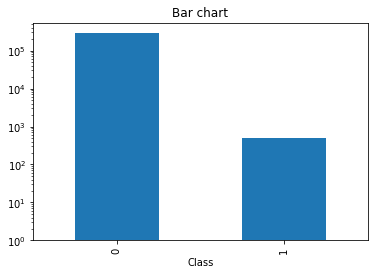

In [9]:
# Predicted Values
preds_by_quality=df.value_counts('Class', sort= True)
# Plot with a log scale so that instances of fraud actually show up on the graph
preds_by_quality.plot(kind= 'bar', log = True)
plt.title('Bar chart')

print(preds_by_quality)

# Source: Week 4 Lecture

The dataset is extremely unbalanced, with relatively few instances of fraud.  This unbalance is probably fine, becuase it represents the real world frequency of fraud occurence and neural networks can handle unbalanced data.  The model has to learn how to identify fraud, even when it's not widepsread.

## Using a Nueral Net to Predict

Split into Train and Test sets

In [10]:
#gather up names of all the columns
cols = df.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'Class'
feature_cols = [c for c in cols if c != prediction_col]

x = df[feature_cols]
y = df[prediction_col]

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

# Source: Week 5 Lecture

Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

# Source: Week 5 Lecture

Initiate and Train the Model

In [12]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

Below, I construct the model using Keras libraries.  It has an input layer, 2 hidden layers, and 1 output layer. The input and hidden layers have 10 nodes. The output layer has 1 node because it is a binary classification.  That is also why I use the 'sigmoid' activation function. The 'binary_crossentropy' loss function is also appropriate for this binary classifcation problem. 

In [13]:
backend.clear_session()

# Initiate the model
model = models.Sequential()
# Input Layer
model.add(layers.Dense(10, activation = 'relu', input_shape = (x_train.shape[1],)))
# Hidden Layers
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(10, activation = 'relu'))
# Output Layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model. 
# the early stopping parameter optimizes the model.  Once the validation accuracy doesn't increase from a maximum for 5
# epochs, it stops running and restores the weights that achieved the maximum score.
history = model.fit(x_train,
                   y_train,
                   epochs = 26,
                   validation_split=0.2,
                   verbose = 0,
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

# Source: Prior Coureswork in MSDS 684

## Plotting the training and validation loss

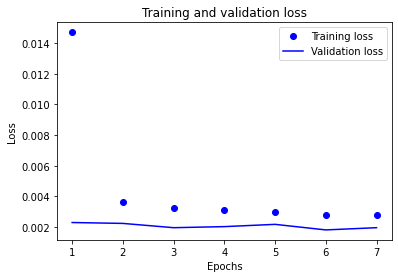

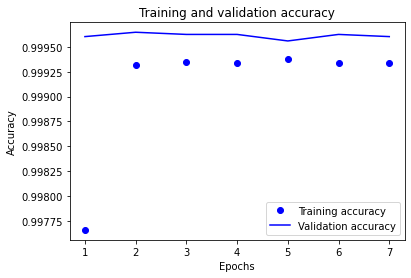

1781/1781 [==============================] - 1s 658us/step - loss: 0.0034 - accuracy: 0.9992
test_acc: 0.9992451071739197


In [14]:
# Plot the training and validation loss
# Source: my own coursework from MSDS 684: Deep Learning

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

The model is extremely accurate at 99.925% accuracy.  It achieves this best accuracy after 7 epochs.  The training loss decreases substantially after the first epoch and then more or less plateaus.  The validation loss is close to the training loss, but is actually a slight improvement throughout. With the early stopping argument given to the fit function, the model stops once it has not improved for a number of iterations.  Then, the best score achieved is recalled and the weights are restored.  This is a method of optimizing the model and why all the epochs defined for training are not plotted.

## Reporting the Performance

In [21]:
# make predictions
predictions = model.predict(x_test)
# Format Predictions as 1 or 0
predictions  = np.rint(predictions)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix  

# Display Confusion Matrix and Classification Report
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

# Source: Week 5 Lecture

[[56854    14]
 [   29    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.82      0.69      0.75        94

    accuracy                           1.00     56962
   macro avg       0.91      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



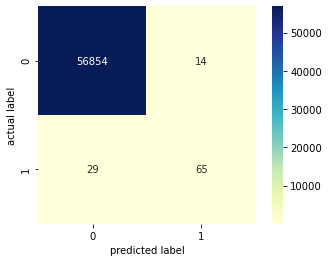

In [23]:
# make a confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

# Source: Week 4 Lecture

## Interpretation

The classification report above echoes the accuracy score from the previous step.  The accuracy of the model is really close to 100%.  

The confusion matrix confirms this.  56,854 0s (non-fraud) and 65 1s (fraud) were classified correctly.  29 1s were classified as 0.  This means that 29 instances of fraud escaped the models detection as false negatives.  Correspondingly, 14 0s were classified as 1s.  This means that the model mistook 14 safe transactions as fraud, or false positives.  In practice it would be worse to have a false negative than a false positive.  

The false positives impact the precision score.  For 1s (Fraud), the precision was 82%, meaning that 82% of the predicted instances of fraud were actually fraud.  On the other hand the false negatives impact the recall.  For 1s (fraud), the recall was 69%.  This means that 69% of all instances that belong to the 1s class were actually identified.  This means that 31% of instances of fraud go undetected.  In this context, I think the bank would rather have a higher recall than a higher precision, just because fraud is a big problem and it would be better to flag more transactions and investigate them, than to just let them slip through the cracks.  

However, the model does very well overall and in practice, these banks probably use some neural networks in their fraud detection departments.